Speciific requirements for the report
Each group will create a final electronic report (max 2000 written words, not including citations) using Jupyter to communicate the question asked, the analysis performed and the conclusion reached.

You must submit 2 files:

the source Jupyter notebook (.ipynb file)
the rendered final document (.html file) 

Each report should include the following sections:


**Title**

**Introduction:**

-provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

-clearly state the question you tried to answer with your project

-identify and describe the dataset that was used to answer the question

**Methods & Results:**

-describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

-your report should include code which:

    -loads data from the original source on the web 
    -wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    -performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    -creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    -performs the data analysis
    -creates a visualization of the analysis 
    
note: all tables and figure should have a figure/table number and a legend

- Loading libraries


In [2]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

- Reading files from the web

In [3]:
download.file("https://raw.githubusercontent.com/Dana-Te/DSCI-100-G41-Apples-Data-Set/main/apple_quality.csv", "apple_quality.csv")
apple_data<- read_csv("apple_quality.csv")
apple_data

Rows: 4001 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Acidity, Quality
dbl (7): A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.491590483,good
1,-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.722809367,good
2,-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.621636473,bad
3,-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.790723217,good
4,1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.501984036,good
5,-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.981523169,bad
6,1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.414170509,good
7,-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.470125066,good
8,-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.871904758,bad


- Cleaned & wrangled data into a tidy table for use

In [13]:
apple_data_wrangled<- apple_data|>
    filter(A_id!="NA")|>
    select(Size:Quality)|>
    mutate(Acidity=as.character(Acidity), Quality= as_factor(Quality))|>
    mutate(Size=as.numeric(Size),
           Weight=as.numeric(Weight),
           Sweetness=as.numeric(Sweetness),
           Crunchiness=as.numeric(Crunchiness),
           Juiciness=as.numeric(Juiciness),
           Ripeness=as.numeric(Ripeness),
           Acidity=as.numeric(Acidity))

apple_data_wrangled

apple_data_mean<- apple_data_wrangled|>
    select(Size:Acidity)|>
    map_df(mean, na.rm=TRUE)

apple_data_quality<-apple_data|>
    filter(A_id!="NA")|>
    select(Quality)|>
    group_by(Quality) |> 
    summarise(Count = n())|>
    pivot_wider(names_from=Quality, values_from=Count)

merge<- cross_join(apple_data_mean, apple_data_quality)
merge

#The 'Merge' table consists of the mean for all the variables (Size to Ripeness), 
#and the number of rows in each classification from Quality( bad or good).
#The data was already tidy and needed not much wrangling.

Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.4915905,good
-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.7228094,good
-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.6216365,bad
-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.7907232,good
1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.5019840,good
-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.9815232,bad
1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.4141705,good
-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.4701251,good
-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.8719048,bad


Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad,good
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
-0.5030146,-0.9895465,-0.4704785,0.9854779,0.512118,0.4982774,0.0768773,1996,2004


- Visualization relevent to the data analysis

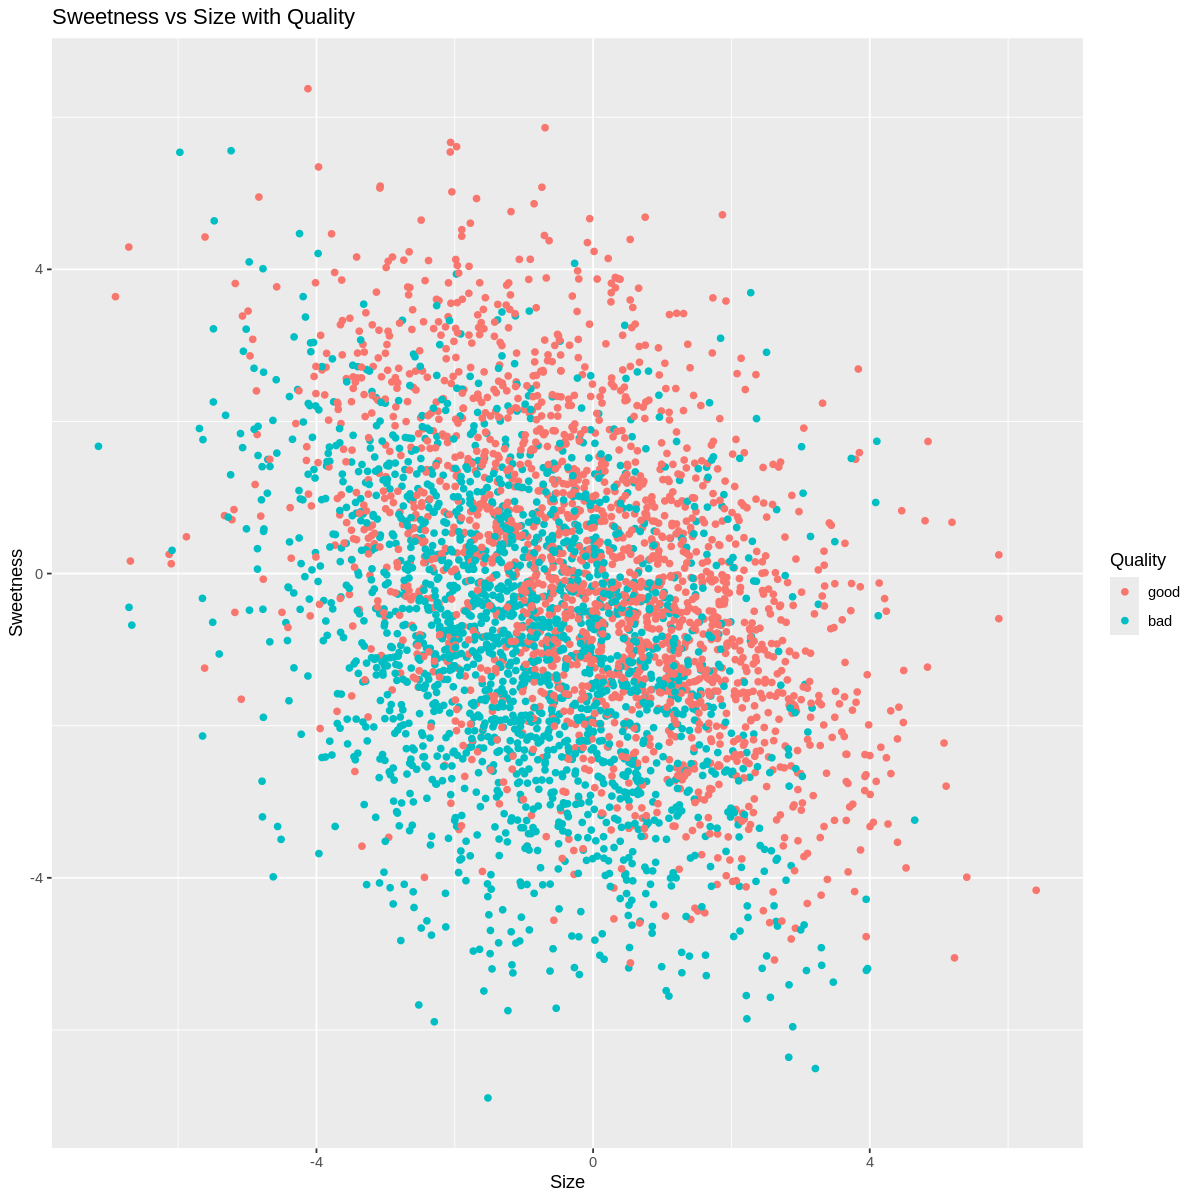

In [14]:
options(repr.plot.width = 10, repr.plot.height = 10)
apple_plot<-apple_data_wrangled|>
    ggplot(aes(x=Size, y=Sweetness, color= Quality)) + 
        geom_point() + 
        ggtitle("Sweetness vs Size with Quality")
apple_plot

- Splitting dataset into training and testing data

In [15]:
set.seed(47752)

apple_split<-initial_split(apple_data_wrangled, prop=0.75, strata= Quality)
apple_train<- training(apple_split)
apple_test<-testing(apple_split)

- Creating the recipe, the K-nearest neighbour classification and workflow

In [16]:
set.seed(93223)
apple_recipe<-recipe(Quality~ ., data=apple_train)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())
apple_recipe

knn_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
       set_engine("kknn") |>
       set_mode("classification")

apple_fit<-workflow() |>
       add_recipe(apple_recipe) |>
       add_model(knn_spec) |>
       fit(data = apple_data_wrangled)



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 7



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



- Making predictions, calculating metrics, and creating the confusion matrix

In [20]:
set.seed(93223)
apple_test_predictions<- predict(apple_fit, apple_test) |>
       bind_cols(apple_test)
apple_test_predictions

apple_mat<- apple_test_predictions |> 
       conf_mat(truth = Quality, estimate = .pred_class)
apple_mat

.pred_class,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
bad,-0.29202386,-1.3512820,-1.73842916,-0.34261593,2.8386355,-0.03803333,2.6216365,bad
good,-0.65719577,-2.2716266,1.32487385,-0.09787472,3.6379705,-3.41376134,0.7907232,good
bad,-3.86763223,-3.7345136,0.98642907,-1.20765455,2.2928729,4.08092079,-4.8719048,bad
good,2.83958094,-0.3447982,-1.01979729,0.89458086,-1.3000609,0.58237862,1.7097082,good
good,-2.65988739,-2.7956842,4.23040359,0.69755040,2.1809111,-0.08877540,-1.0836208,good
bad,-1.46895155,-1.9503596,-2.21437289,0.90975851,2.8644489,3.96595566,-0.5582087,bad
bad,-0.30236427,1.7243958,-2.44233722,3.46510848,0.4497917,-0.07436245,2.4937820,bad
bad,-2.33458950,-2.9437089,-3.45262772,0.76239173,4.0764624,6.34644535,0.7267757,bad
good,-0.30069828,-0.5136033,0.92100624,1.37817207,2.2747467,0.74533638,-2.9340289,good


          Truth
Prediction good bad
      good  469  30
      bad    32 469

**Discussion:**

-summarize what you found

-discuss whether this is what you expected to find?

-discuss what impact could such findings have?

-discuss what future questions could this lead to?

**References**

-At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).

-Make sure to cite the source of your data as well.

hint - you can use your proposal as a basis for your final report